# AY250-homewor 4
## by Ying Cao

In [2]:
# Simple serial implemetation 
# the given
from random import uniform
from math import sqrt
from time import time

# total darts to generate
no_darts = 200000
# used to count number of darts in the circle
no_darts_circle = 0

# start time
tic = time()

# throw the given nuber of darts, and check whether each of them is in circle
for n in range(no_darts):
    x, y = uniform(0,1), uniform(0,1)
    if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
        no_darts_circle += 1

# end time
tac  = time()
# execution time
execution_time = tac - tic

# approximate Pi
# area of circle = pi*r**2; area of the square = 4*r*2*2 and r = 0.5 here
Pi_approx = 4 * no_darts_circle / no_darts

print("Pi Approximation: ", Pi_approx)
print("Number of Darts: ", no_darts)
print("Execution Time (s): ", execution_time)
print("Darts Thrown per Second:", no_darts/execution_time)

Pi Approximation:  3.14092
Number of Darts:  200000
Execution Time (s):  0.4401073455810547
Darts Thrown per Second: 454434.58739810094


In [55]:
import numpy as np

# Specify experiments parameters
no_darts_set = np.logspace(1,7,10)

# Number of simulations
no_sim = 100 

# Array to store results
Times = np.zeros((no_sim,len(no_darts_set)))
Rates = np.zeros((no_sim,len(no_darts_set)))
Pis = np.zeros((no_sim,len(no_darts_set)))


## Simple Serial Method

In [56]:

Time_Means_serial = np.zeros(len(no_darts_set))
Time_Stds_serial  = np.zeros(len(no_darts_set))

Rates_Means_serial  = np.zeros(len(no_darts_set))
Rates_Stds_serial  = np.zeros(len(no_darts_set))

for no_set in range(len(no_darts_set)):
    no_darts = int(no_darts_set[no_set])
    print("No_darts: ", no_darts)
    for simulation in range(no_sim):# start time
        #print(simulation+1)
        no_darts_circle = 0
        tic = time()

        # throw the given nuber of darts, and check whether each of them is in circle
        for n in range(no_darts):
            x, y = uniform(0,1), uniform(0,1)
            if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
                no_darts_circle += 1

        # end time
        tac  = time()
        # execution time
        execution_time = tac - tic
        Times[simulation,no_set] = execution_time

        # approximate Pi
        # area of circle = pi*r**2; area of the square = 4*r*2*2 and r = 0.5 here
        Pis[simulation,no_set]  = 4 * no_darts_circle / no_darts
        
        # Rate
        Rates[simulation,no_set] = no_darts/execution_time
    
    Time_Means_serial[no_set] = np.mean(Times[:,no_set])
    Time_Stds_serial[no_set] = np.std(Times[:,no_set])
    Rates_Means_serial[no_set] = np.mean(Rates[:,no_set])
    Rates_Stds_serial[no_set] = np.std(Rates[:,no_set])


No_darts:  10
No_darts:  46
No_darts:  215
No_darts:  1000
No_darts:  4641
No_darts:  21544
No_darts:  100000
No_darts:  464158
No_darts:  2154434
No_darts:  10000000


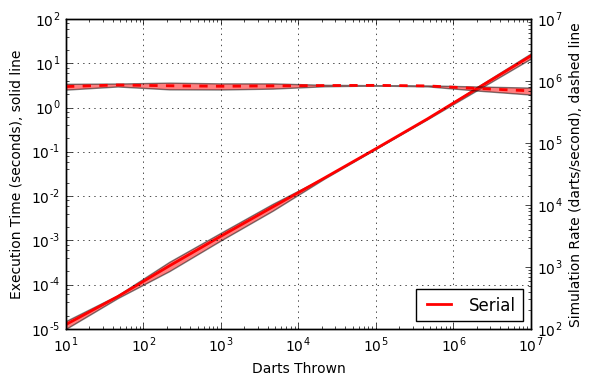

In [59]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog(no_darts_set, Time_Means_serial, '-', label = 'Serial', c='red', lw=2)
ax1.fill_between(no_darts_set, Time_Means_serial-Time_Stds_serial, Time_Means_serial+Time_Stds_serial,
                 facecolor='red', alpha=0.5)

ax2 = ax1.twinx()
ax2.loglog(no_darts_set, Rates_Means_serial, '--', c='red', lw=2)
ax2.fill_between(no_darts_set, Rates_Means_serial-Rates_Stds_serial, Rates_Means_serial+Rates_Stds_serial,
                 facecolor='red', alpha=0.5)

ax1.legend(loc=4)
ax1.grid()
ax1.set_xlabel("Darts Thrown")
ax1.set_ylabel("Execution Time (seconds), solid line")
ax2.set_ylabel("Simulation Rate (darts/second), dashed line")
ax2.set_ylim(10**2, 10**7)
plt.show()

fig.savefig('Serial.png')

# multiprocessing or concurrent.futures

# ipyparallel module or dask

# Comparison plot - errorbar plots

# remember to write readme